# Check Correlation

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
raw_df1=pd.read_csv('raw_data1.csv')
raw_df2=pd.read_csv('raw_data2.csv')
final_df1=pd.read_csv('final_data1.csv') # For LightSail -2 
final_df2=pd.read_csv('final_data2.csv') # For IRAZU



In [4]:
final_df2

buffers_free  obc_temp1  obc_temp2  com_temp_pa  com_temp_mcu  \
0              399       30.8       31.3          307           310   
1              399       30.7       31.2          306           310   
2              399       30.7       31.1          306           309   
3              399       30.6       31.1          305           309   
4              399       30.5       31.0          304           308   
...            ...        ...        ...          ...           ...   
2011           399       28.8       29.2          285           288   
2012           399       28.9       29.3          285           288   
2013           399       28.9       29.3          286           288   
2014           399       29.0       29.4          287           289   
2015           399       29.1       29.5          287           289   

      eps_temp_t4  bat_voltage  cur_sun  cur_sys  batt_mode  ...  \
0              26         8248        0       79          3  ...   
1              26         8248        0       79          3  ...   
2              26         8248        0       79          3  ...   
3              26         8248        0       79          3  ...   
4              26         8248        0       79          3  ...   
...           ...          ...      ...      ...        ...  ...   
2011           24         8304      124       79          3  ...   
2012           24         8304      124       79          4  ...   
2013           24         8304      118       79          3  ...   
2014           24         8304      118       79          3  ...   
2015           24         8304      118       79          3  ...   

      Electron 2 MeV  Proton 1 MeV  Proton 100 MeV  Proton 10 MeV  \
0          2900000.0      470000.0          4100.0        22000.0   
1          2900000.0      470000.0          4100.0        22000.0   
2          2900000.0      470000.0          4100.0        22000.0   
3          2900000.0      470000.0          4100.0        22000.0   
4          2900000.0      470000.0          4100.0        22000.0   
...              ...           ...             ...            ...   
2011        220000.0      490000.0          4000.0        22000.0   
2012        220000.0      490000.0          4000.0        22000.0   
2013        220000.0      490000.0          4000.0        22000.0   
2014        220000.0      490000.0          4000.0        22000.0   
2015        220000.0      490000.0          4000.0        22000.0   

      SESC sunspot number  X-ray Background Flux    Radio Flux  X-Ray S  \
0                       0           8.000000e-08  7.100000e-21        0   
1                       0           8.000000e-08  7.100000e-21        0   
2                       0           8.000000e-08  7.100000e-21        0   
3                       0           8.000000e-08  7.100000e-21        0   
4                       0           8.000000e-08  7.100000e-21        0   
...                   ...                    ...           ...      ...   
2011                   12           8.100000e-08  7.300000e-21        0   
2012                   12           8.100000e-08  7.300000e-21        0   
2013                   12           8.100000e-08  7.300000e-21        0   
2014                   12           8.100000e-08  7.300000e-21        0   
2015                   12           8.100000e-08  7.300000e-21        0   

      New Regions  Sunspot Area  
0               0         0.000  
1               0         0.000  
2               0         0.000  
3               0         0.000  
4               0         0.000  
...           ...           ...  
2011            0         0.001  
2012            0         0.001  
2013            0         0.001  
2014            0         0.001  
2015            0         0.001  

[2016 rows x 59 columns]

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
raw_df1.head()

dest_callsign src_callsign  src_ssid  dest_ssid  ctl  pid    src_ip_addr  \
0        N6CP         KK6HIT         2          1    3  204  129.65.147.35   
1        N6CP         KK6HIT         2          1    3  204  129.65.147.35   
2        N6CP         KK6HIT         2          1    3  204  129.65.147.35   
3        N6CP         KK6HIT         2          1    3  204  129.65.147.35   
4        N6CP         KK6HIT         2          1    3  204  129.65.147.35   

  dst_ip_addr  src_port  dst_port  type  daughter_atmp  daughter_btmp  \
0   224.0.0.1     50000         2     1           19.0           18.5   
1   224.0.0.1     50000         2     1           19.0           18.5   
2   224.0.0.1     50000         2     1           19.0           18.5   
3   224.0.0.1     50000         2     1           18.5           18.5   
4   224.0.0.1     50000         2     1           18.5           18.5   

   threev_pltmp  rf_amptmp  nx_tmp  px_tmp  ny_tmp  py_tmp  nz_tmp  pz_tmp  \
0          18.5       24.0   -26.5   -25.5   -30.5   -26.0     6.5   -18.0   
1          18.0       25.0   -27.0   -26.0   -31.0   -26.5     6.0   -17.5   
2          18.0       24.5   -27.0   -26.5   -31.5   -27.5     6.0   -17.5   
3          18.0       24.0   -27.5   -26.5   -31.5   -27.0     5.5   -17.5   
4          18.0       23.5   -27.5   -27.0   -32.0   -27.5     5.5   -17.5   

   atmelpwrcurr  atmelpwrbusv  threev_pwrcurr  threev_pwrbusv  \
0      0.032715       3.78125        0.019531          3.3125   
1      0.041992       3.78125        0.019531          3.3125   
2      0.025391       3.78125        0.025391          3.3125   
3      0.025391       3.75000        0.019531          3.3125   
4      0.024902       3.78125        0.019531          3.3125   

   threev_plpwrcurr  threev_plpwrbusv  fivev_plpwrcurr  fivev_plpwrbusv  \
0          0.023438           3.31250         0.281250          4.90625   
1          0.023438           3.28125         0.609375          4.87500   
2          0.023438           3.31250         0.609375          4.87500   
3          0.023438           3.31250         0.609375          4.87500   
4          0.023438           3.31250         0.609375          4.87500   

   daughter_apwrcurr  daughter_apwrbusv  daughter_bpwrcurr  daughter_bpwrbusv  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   nx_intpwrcurr  nx_intpwrbusv  nx_extpwrcurr  nx_extpwrbusv  px_intpwrcurr  \
0            0.0        3.81250            0.0        3.81250            0.0   
1            0.0        3.78125            0.0        3.78125            0.0   
2            0.0        3.78125            0.0        3.78125            0.0   
3            0.0        3.78125            0.0        3.78125            0.0   
4            0.0        3.78125            0.0        3.78125            0.0   

   px_intpwrbusv  px_extpwrcurr  px_extpwrbusv  ny_intpwrcurr  ny_intpwrbusv  \
0        3.81250            0.0        3.81250            0.0        3.81250   
1        3.78125            0.0        3.78125            0.0        3.78125   
2        3.78125            0.0        3.78125            0.0        3.78125   
3        3.78125            0.0        3.78125            0.0        3.78125   
4        3.78125            0.0        3.78125            0.0        3.78125   

   ny_extpwrcurr  ny_extpwrbusv  py_intpwrcurr  py_intpwrbusv  py_extpwrcurr  \
0            0.0        3.81250            0.0        3.81250            0.0   
1            0.0        3.78125            0.0        3.78125            0.0   
2            0.0        3.78125            0.0        3.78125            0.0   
3            0

In [7]:
final_df1.head()

daughter_atmp  daughter_btmp  threev_pltmp  rf_amptmp  nx_tmp  px_tmp  \
0           19.0           18.5          18.5       24.0   -26.5   -25.5   
1           19.0           18.5          18.0       25.0   -27.0   -26.0   
2           19.0           18.5          18.0       24.5   -27.0   -26.5   
3           18.5           18.5          18.0       24.0   -27.5   -26.5   
4           18.5           18.5          18.0       23.5   -27.5   -27.0   

   ny_tmp  py_tmp  nz_tmp  pz_tmp  atmelpwrcurr  atmelpwrbusv  threev_pwrcurr  \
0   -30.5   -26.0     6.5   -18.0      0.032715       3.78125        0.019531   
1   -31.0   -26.5     6.0   -17.5      0.041992       3.78125        0.019531   
2   -31.5   -27.5     6.0   -17.5      0.025391       3.78125        0.025391   
3   -31.5   -27.0     5.5   -17.5      0.025391       3.75000        0.019531   
4   -32.0   -27.5     5.5   -17.5      0.024902       3.78125        0.019531   

   threev_plpwrcurr  threev_plpwrbusv  fivev_plpwrcurr  fivev_plpwrbusv  \
0          0.023438           3.31250         0.281250          4.90625   
1          0.023438           3.28125         0.609375          4.87500   
2          0.023438           3.31250         0.609375          4.87500   
3          0.023438           3.31250         0.609375          4.87500   
4          0.023438           3.31250         0.609375          4.87500   

   daughter_apwrbusv  nx_intpwrcurr  nx_intpwrbusv  nx_extpwrcurr  \
0                0.0            0.0        3.81250            0.0   
1                0.0            0.0        3.78125            0.0   
2                0.0            0.0        3.78125            0.0   
3                0.0            0.0        3.78125            0.0   
4                0.0            0.0        3.78125            0.0   

   nx_extpwrbusv  px_intpwrcurr  px_intpwrbusv  px_extpwrcurr  px_extpwrbusv  \
0        3.81250            0.0        3.81250            0.0        3.81250   
1        3.78125            0.0        3.78125            0.0        3.78125   
2        3.78125            0.0        3.78125            0.0        3.78125   
3        3.78125            0.0        3.78125            0.0        3.78125   
4        3.78125            0.0        3.78125            0.0        3.78125   

   ny_intpwrcurr  ny_intpwrbusv  ny_extpwrcurr  ny_extpwrbusv  py_intpwrcurr  \
0            0.0        3.81250            0.0        3.81250            0.0   
1            0.0        3.78125            0.0        3.78125            0.0   
2            0.0        3.78125            0.0        3.78125            0.0   
3            0.0        3.78125            0.0        3.78125            0.0   
4            0.0        3.78125            0.0        3.78125            0.0   

   py_intpwrbusv  py_extpwrcurr  py_extpwrbusv  nz_extpwrcurr  nz_extpwrbusv  \
0        3.81250            0.0        3.81250            0.0        3.81250   
1        3.78125            0.0        3.78125            0.0        3.78125   
2        3.78125            0.0        3.78125            0.0        3.78125   
3        3.78125            0.0        3.78125            0.0        3.78125   
4        3.78125            0.0        3.78125            0.0        3.78125   

   usercputime  syscputime  idlecputime  processes  memfree  cached  datafree  \
0       344035     1611340     17276152      42644    13484   90276     97816   
1       344064     1611498     17277368      42646    13456   90276     97816   
2       344085     1611581     17277959      42647    13484   90276     97816   
3       344100     1611658     17278566      42648    13484   90276     97816   
4       344120     1611741     17279165      42649    13476   90276     97816   

   nanderasures  beaconcnt    boottime  long_dur_counter  flags    q0_act  \
0          4304      27500  1579390016               752     31  0.312500   
1          4304      27502  1579390016               752     31  0.343750   
2          4304      27503  1579

In [8]:
final_df1.corr()

daughter_atmp  daughter_btmp  threev_pltmp  rf_amptmp  \
daughter_atmp               1.000000       0.999550      0.999678   0.985849   
daughter_btmp               0.999550       1.000000      0.999317   0.983330   
threev_pltmp                0.999678       0.999317      1.000000   0.986263   
rf_amptmp                   0.985849       0.983330      0.986263   1.000000   
nx_tmp                      0.837234       0.842659      0.835935   0.763432   
...                              ...            ...           ...        ...   
X-Ray S                    -0.387222      -0.386184     -0.387450  -0.363775   
Radio Flux                 -0.059808      -0.059413     -0.059173  -0.036227   
New Regions                -0.022182      -0.023250     -0.020878  -0.016921   
X-ray Background Flux       0.438807       0.437790      0.440899   0.423186   
Sunspot Area                0.321705       0.321942      0.320021   0.362646   

                         nx_tmp    px_tmp    ny_tmp    py_tmp    nz_tmp  \
daughter_atmp          0.837234  0.827711  0.706183  0.826757  0.868618   
daughter_btmp          0.842659  0.835056  0.714054  0.832769  0.876524   
threev_pltmp           0.835935  0.826764  0.704283  0.826462  0.866037   
rf_amptmp              0.763432  0.749815  0.631022  0.734370  0.782459   
nx_tmp                 1.000000  0.976183  0.909521  0.965160  0.892717   
...                         ...       ...       ...       ...       ...   
X-Ray S               -0.277571 -0.286061 -0.349669 -0.342161 -0.401194   
Radio Flux             0.049560  0.006014 -0.083273 -0.058779 -0.095920   
New Regions           -0.058781 -0.054259 -0.056883 -0.049424 -0.037797   
X-ray Background Flux  0.493764  0.441172  0.427069  0.456877  0.454522   
Sunspot Area           0.215608  0.186904  0.099354  0.097738  0.189123   

                         pz_tmp  atmelpwrcurr  atmelpwrbusv  threev_pwrcurr  \
daughter_atmp          0.231402      0.063293      0.327607       -0.271177   
daughter_btmp          0.231470      0.059736      0.341728       -0.271999   
threev_pltmp           0.232711      0.061359      0.325355       -0.273695   
rf_amptmp              0.225350      0.074766      0.244197       -0.262242   
nx_tmp                 0.409406      0.004318      0.552880       -0.320028   
...                         ...           ...           ...             ...   
X-Ray S                0.312966     -0.148642     -0.241022        0.096531   
Radio Flux             0.397812     -0.071586     -0.157514       -0.045862   
New Regions           -0.069061      0.062303     -0.029760       -0.000824   
X-ray Background Flux  0.089421      0.116960      0.177783       -0.203722   
Sunspot Area           0.230010      0.019504     -0.087475       -0.119697   

                       threev_plpwrcurr  threev_plpwrbusv  fivev_plpwrcurr  \
daughter_atmp                 -0.093832          0.794159        -0.284363   
daughter_btmp                 -0.095786          0.795853        -0.281710   
threev_pltmp                  -0.090875          0.793318        -0.286502   
rf_amptmp                     -0.075726          0.761230        -0.289483   
nx_tmp                        -0.141956          0.684757        -0.293169   
...                                 ...               ...              ...   
X-Ray S                        0.035122         -0.448867         0.161980   
Radio Flux                    -0.013816         -0.222983        -0.048686   
New Regions                   -0.026477          0.048481         0.000645   
X-ray Background Flux         -0.071920          0.367519        -0.306196   
Sunspot Area                  -0.035179          0.022967        -0.161070   

                       fivev_plpwrbusv  daughter_apwrbusv  nx_intpwrcurr  \
daughter_atmp                 0.514786           0.039398       0.101716   
daughter_btmp                 0.514787           0.039360       0.106960   
threev_pltmp                  0.513290         

In [9]:
set(raw_df1.columns)-set(final_df1.columns)

{'College K 0-3',
 'Neutron',
 'Optical 1',
 'Optical 2',
 'Optical 3',
 'Solar Mean Field',
 'X-Ray C',
 'X-Ray M',
 'X-Ray X',
 'adcs_mode',
 'buffers',
 'cam0_status',
 'cam1_pics_remaining',
 'ctl',
 'daughter_apwrcurr',
 'daughter_bpwrbusv',
 'daughter_bpwrcurr',
 'dest_callsign',
 'dest_ssid',
 'dst_ip_addr',
 'dst_port',
 'motor_cnt',
 'motor_limit',
 'motor_pwrbusv',
 'pic_panel_flags',
 'pid',
 'src_callsign',
 'src_ip_addr',
 'src_port',
 'src_ssid',
 'threev_pwrbusv',
 'type'}

In [10]:
"daughter_atmp" in final_df1.corr()

True

In [11]:
f=[set(list(final_df1.columns))-set(list(final_df2.columns))]

In [12]:
f

[{'atmelpwrbusv',
  'atmelpwrcurr',
  'bat0_ctlflags',
  'bat0_curr',
  'bat0_flags',
  'bat0_temp',
  'bat0_volt',
  'bat1_ctlflags',
  'bat1_curr',
  'bat1_flags',
  'bat1_temp',
  'bat1_volt',
  'bat2_ctlflags',
  'bat2_curr',
  'bat2_flags',
  'bat2_temp',
  'bat2_volt',
  'bat3_ctlflags',
  'bat3_curr',
  'bat3_flags',
  'bat3_temp',
  'bat3_volt',
  'bat4_ctlflags',
  'bat4_curr',
  'bat4_flags',
  'bat4_temp',
  'bat4_volt',
  'bat5_ctlflags',
  'bat5_curr',
  'bat5_flags',
  'bat5_temp',
  'bat5_volt',
  'bat6_ctlflags',
  'bat6_curr',
  'bat6_flags',
  'bat6_temp',
  'bat6_volt',
  'bat7_ctlflags',
  'bat7_curr',
  'bat7_flags',
  'bat7_temp',
  'bat7_volt',
  'beaconcnt',
  'boottime',
  'cached',
  'cam0_last_contact',
  'cam0_pics_remaining',
  'cam0_retry_fails',
  'cam0_temp',
  'cam1_last_contact',
  'cam1_retry_fails',
  'cam1_status',
  'cam1_temp',
  'comm_rxbytes',
  'comm_rxcount',
  'comm_txbytes',
  'comm_txcount',
  'datafree',
  'daughter_apwrbusv',
  'daughter_

In [13]:
correlated_features1 = set()
correlation_matrix1 = final_df1.corr()

In [14]:
correlation_matrix1

daughter_atmp  daughter_btmp  threev_pltmp  rf_amptmp  \
daughter_atmp               1.000000       0.999550      0.999678   0.985849   
daughter_btmp               0.999550       1.000000      0.999317   0.983330   
threev_pltmp                0.999678       0.999317      1.000000   0.986263   
rf_amptmp                   0.985849       0.983330      0.986263   1.000000   
nx_tmp                      0.837234       0.842659      0.835935   0.763432   
...                              ...            ...           ...        ...   
X-Ray S                    -0.387222      -0.386184     -0.387450  -0.363775   
Radio Flux                 -0.059808      -0.059413     -0.059173  -0.036227   
New Regions                -0.022182      -0.023250     -0.020878  -0.016921   
X-ray Background Flux       0.438807       0.437790      0.440899   0.423186   
Sunspot Area                0.321705       0.321942      0.320021   0.362646   

                         nx_tmp    px_tmp    ny_tmp    py_tmp    nz_tmp  \
daughter_atmp          0.837234  0.827711  0.706183  0.826757  0.868618   
daughter_btmp          0.842659  0.835056  0.714054  0.832769  0.876524   
threev_pltmp           0.835935  0.826764  0.704283  0.826462  0.866037   
rf_amptmp              0.763432  0.749815  0.631022  0.734370  0.782459   
nx_tmp                 1.000000  0.976183  0.909521  0.965160  0.892717   
...                         ...       ...       ...       ...       ...   
X-Ray S               -0.277571 -0.286061 -0.349669 -0.342161 -0.401194   
Radio Flux             0.049560  0.006014 -0.083273 -0.058779 -0.095920   
New Regions           -0.058781 -0.054259 -0.056883 -0.049424 -0.037797   
X-ray Background Flux  0.493764  0.441172  0.427069  0.456877  0.454522   
Sunspot Area           0.215608  0.186904  0.099354  0.097738  0.189123   

                         pz_tmp  atmelpwrcurr  atmelpwrbusv  threev_pwrcurr  \
daughter_atmp          0.231402      0.063293      0.327607       -0.271177   
daughter_btmp          0.231470      0.059736      0.341728       -0.271999   
threev_pltmp           0.232711      0.061359      0.325355       -0.273695   
rf_amptmp              0.225350      0.074766      0.244197       -0.262242   
nx_tmp                 0.409406      0.004318      0.552880       -0.320028   
...                         ...           ...           ...             ...   
X-Ray S                0.312966     -0.148642     -0.241022        0.096531   
Radio Flux             0.397812     -0.071586     -0.157514       -0.045862   
New Regions           -0.069061      0.062303     -0.029760       -0.000824   
X-ray Background Flux  0.089421      0.116960      0.177783       -0.203722   
Sunspot Area           0.230010      0.019504     -0.087475       -0.119697   

                       threev_plpwrcurr  threev_plpwrbusv  fivev_plpwrcurr  \
daughter_atmp                 -0.093832          0.794159        -0.284363   
daughter_btmp                 -0.095786          0.795853        -0.281710   
threev_pltmp                  -0.090875          0.793318        -0.286502   
rf_amptmp                     -0.075726          0.761230        -0.289483   
nx_tmp                        -0.141956          0.684757        -0.293169   
...                                 ...               ...              ...   
X-Ray S                        0.035122         -0.448867         0.161980   
Radio Flux                    -0.013816         -0.222983        -0.048686   
New Regions                   -0.026477          0.048481         0.000645   
X-ray Background Flux         -0.071920          0.367519        -0.306196   
Sunspot Area                  -0.035179          0.022967        -0.161070   

                       fivev_plpwrbusv  daughter_apwrbusv  nx_intpwrcurr  \
daughter_atmp                 0.514786           0.039398       0.101716   
daughter_btmp                 0.514787           0.039360       0.106960   
threev_pltmp                  0.513290         

In [15]:
for i in range(len(correlation_matrix1.columns)):
    for j in range(i):
        if abs(correlation_matrix1.iloc[i, j]) > 0.9:
            colname = correlation_matrix1.columns[i]
            correlated_features1.add(colname)

In [16]:
(correlated_features1)

{'College A',
 'College K 12-15',
 'College K 15-18',
 'College K 18-21',
 'College K 21-24',
 'College K 6-9',
 'College K 9-12',
 'Electron 2 MeV',
 'Fredericksburg A',
 'Fredericksburg K 0-3',
 'Fredericksburg K 12-15',
 'Fredericksburg K 15-18',
 'Fredericksburg K 18-21',
 'Fredericksburg K 21-24',
 'Fredericksburg K 3-6',
 'Fredericksburg K 9-12',
 'New Regions',
 'Planetary A',
 'Planetary K 18-21',
 'Planetary K 21-24',
 'Planetary K 9-12',
 'Proton 1 MeV',
 'Proton 100 MeV',
 'SESC sunspot number',
 'Sunspot Area',
 'X-ray Background Flux',
 'bat1_ctlflags',
 'bat1_curr',
 'bat1_flags',
 'bat1_temp',
 'bat1_volt',
 'bat2_ctlflags',
 'bat2_curr',
 'bat2_flags',
 'bat2_temp',
 'bat2_volt',
 'bat3_ctlflags',
 'bat3_temp',
 'bat4_ctlflags',
 'bat4_temp',
 'bat5_ctlflags',
 'bat5_curr',
 'bat5_flags',
 'bat5_temp',
 'bat5_volt',
 'bat6_ctlflags',
 'bat6_curr',
 'bat6_flags',
 'bat6_temp',
 'bat6_volt',
 'bat7_ctlflags',
 'bat7_temp',
 'bat7_volt',
 'beaconcnt',
 'boottime',
 'cached

In [17]:
final_df2.corr()

buffers_free  obc_temp1  obc_temp2  com_temp_pa  \
buffers_free                1.000000   0.043358   0.043842     0.035116   
obc_temp1                   0.043358   1.000000   0.999859     0.979116   
obc_temp2                   0.043842   0.999859   1.000000     0.977730   
com_temp_pa                 0.035116   0.979116   0.977730     1.000000   
com_temp_mcu                0.034685   0.977584   0.976123     0.999616   
eps_temp_t4                 0.032481   0.970047   0.968877     0.980432   
bat_voltage                 0.016814  -0.212072  -0.211999    -0.278947   
cur_sun                     0.015606  -0.461948  -0.461647    -0.519535   
cur_sys                    -0.022787  -0.425083  -0.424711    -0.431084   
batt_mode                   0.023144  -0.162469  -0.161406    -0.193667   
panel1_voltage              0.004032  -0.137277  -0.138454    -0.148574   
panel2_voltage              0.004437  -0.122985  -0.124199    -0.133072   
panel3_voltage             -0.004765  -0.383250  -0.382933    -0.438640   
panel1_current              0.011520  -0.413912  -0.414489    -0.447736   
panel2_current              0.032359  -0.442967  -0.442182    -0.492681   
gyro_x                     -0.016053  -0.414556  -0.416250    -0.370115   
gyro_y                      0.000903   0.003530   0.003307     0.016922   
gyro_z                      0.006291   0.060945   0.059187     0.090587   
magneto_x                   0.023938  -0.081665  -0.083371    -0.050307   
magneto_y                  -0.016921   0.242891   0.243176     0.263342   
magneto_z                  -0.028730   0.398816   0.398252     0.431181   
Planetary K 18-21           0.018234  -0.021028  -0.021546     0.010530   
Planetary K 9-12            0.005656   0.020056   0.020949     0.029873   
College K 0-3               0.023971   0.037467   0.036604     0.069841   
Fredericksburg K 18-21     -0.008378   0.080647   0.082091     0.067862   
College K 21-24             0.016488   0.030322   0.029724     0.052639   
College K 15-18             0.005938   0.056831   0.056213     0.083052   
Fredericksburg K 9-12      -0.005062  -0.048870  -0.048417    -0.044924   
Fredericksburg K 15-18     -0.016348   0.060518   0.060245     0.077389   
College K 12-15             0.008480   0.018352   0.017676     0.039673   
College A                   0.021209   0.001273   0.000429     0.031011   
Planetary K 21-24           0.010055   0.074771   0.074668     0.091671   
College K 6-9               0.004511   0.105258   0.105680     0.115234   
Planetary K 3-6             0.017658  -0.059089  -0.059302    -0.058112   
Fredericksburg K 21-24      0.004880  -0.021858  -0.020881    -0.023336   
Fredericksburg A            0.028658   0.003221   0.002988     0.019556   
Planetary K 15-18          -0.022708   0.008072   0.008012     0.022579   
College K 9-12              0.021712  -0.083920  -0.084745    -0.065654   
Fredericksburg K 12-15      0.005762   0.035987   0.037709     0.012826   
Fredericksburg K 6-9        0.014459  -0.053258  -0.054380    -0.042672   
Planetary K 6-9             0.029769  -0.044547  -0.045612    -0.018275   
Planetary A                 0.026560  -0.015007  -0.016522     0.032219   
Planetary K 0-3             0.008478  -0.017112  -0.018843     0.019457   
College K 18-21            -0.016348   0.060518   0.060245     0.077389   
Planetary K 12-15           0.001192  -0.071035  -0.069651    -0.080443   
College K 3-6               0.026781  -0.134445  -0.135027    -0.136133   
Fredericksburg K 3-6        0.021645  -0.095223  -0.095765    -0.095667   
Fredericksburg K 0-3        0.016775  -0.004882  -0.006518     0.035119   
Electron 800 KeV           -0.014238   0.120941   0.122661     0.105507   
Electron 2 MeV             -0.016227   0.151428   0.153179     0.136903   
Proton 1 MeV               -0.001172   0.085891   0.085855     0.104146   
Proton 100 MeV             -0.005528   0.152019   0.151074     0.189640   
Proton 10 MeV              -0.013955   0.133862  

In [18]:
len(final_df2.columns)

59

In [19]:
correlated_features2 = set()
correlation_matrix2 = final_df2.corr()

In [20]:
correlation_matrix2.head()

buffers_free  obc_temp1  obc_temp2  com_temp_pa  com_temp_mcu  \
buffers_free      1.000000   0.043358   0.043842     0.035116      0.034685   
obc_temp1         0.043358   1.000000   0.999859     0.979116      0.977584   
obc_temp2         0.043842   0.999859   1.000000     0.977730      0.976123   
com_temp_pa       0.035116   0.979116   0.977730     1.000000      0.999616   
com_temp_mcu      0.034685   0.977584   0.976123     0.999616      1.000000   

              eps_temp_t4  bat_voltage   cur_sun   cur_sys  batt_mode  \
buffers_free     0.032481     0.016814  0.015606 -0.022787   0.023144   
obc_temp1        0.970047    -0.212072 -0.461948 -0.425083  -0.162469   
obc_temp2        0.968877    -0.211999 -0.461647 -0.424711  -0.161406   
com_temp_pa      0.980432    -0.278947 -0.519535 -0.431084  -0.193667   
com_temp_mcu     0.982329    -0.273366 -0.512917 -0.432236  -0.191013   

              panel1_voltage  panel2_voltage  panel3_voltage  panel1_current  \
buffers_free        0.004032        0.004437       -0.004765        0.011520   
obc_temp1          -0.137277       -0.122985       -0.383250       -0.413912   
obc_temp2          -0.138454       -0.124199       -0.382933       -0.414489   
com_temp_pa        -0.148574       -0.133072       -0.438640       -0.447736   
com_temp_mcu       -0.143849       -0.128276       -0.431685       -0.441038   

              panel2_current    gyro_x    gyro_y    gyro_z  magneto_x  \
buffers_free        0.032359 -0.016053  0.000903  0.006291   0.023938   
obc_temp1          -0.442967 -0.414556  0.003530  0.060945  -0.081665   
obc_temp2          -0.442182 -0.416250  0.003307  0.059187  -0.083371   
com_temp_pa        -0.492681 -0.370115  0.016922  0.090587  -0.050307   
com_temp_mcu       -0.489118 -0.369745  0.017509  0.089894  -0.048281   

              magneto_y  magneto_z  Planetary K 18-21  Planetary K 9-12  \
buffers_free  -0.016921  -0.028730           0.018234          0.005656   
obc_temp1      0.242891   0.398816          -0.021028          0.020056   
obc_temp2      0.243176   0.398252          -0.021546          0.020949   
com_temp_pa    0.263342   0.431181           0.010530          0.029873   
com_temp_mcu   0.257467   0.427996           0.010023          0.026395   

              College K 0-3  Fredericksburg K 18-21  College K 21-24  \
buffers_free       0.023971               -0.008378         0.016488   
obc_temp1          0.037467                0.080647         0.030322   
obc_temp2          0.036604                0.082091         0.029724   
com_temp_pa        0.069841                0.067862         0.052639   
com_temp_mcu       0.066256                0.067239         0.052498   

              College K 15-18  Fredericksburg K 9-12  Fredericksburg K 15-18  \
buffers_free         0.005938              -0.005062               -0.016348   
obc_temp1            0.056831              -0.048870                0.060518   
obc_temp2            0.056213              -0.048417                0.060245   
com_temp_pa          0.083052              -0.044924                0.077389   
com_temp_mcu         0.083362              -0.046209                0.078799   

              College K 12-15  College A  Planetary K 21-24  College K 6-9  \
buffers_free         0.008480   0.021209           0.010055       0.004511   
obc_temp1            0.018352   0.001273           0.074771       0.105258   
obc_temp2            0.017676   0.000429           0.074668       0.105680   
com_temp_pa          0.039673   0.031011           0.091671       0.115234   
com_temp_mcu         0.040911   0.030552           0.088330       0.112899   

              Planetary K 3-6  Fredericksburg K 21-24  Fredericksburg A  \
buffers_free         0.017658                0.004880          0.028658   
obc_temp1           -0.059089               -0.021858          0.003221   
obc_temp2           -0.059302               -0.020881          0.002988   
com_temp_pa         -0.058112               -0

In [21]:
for i in range(len(correlation_matrix2.columns)):
    for j in range(i):
        if abs(correlation_matrix2.iloc[i, j]) > 0.9:
            colname = correlation_matrix2.columns[i]
            correlated_features2.add(colname)

In [22]:
print(correlated_features2)

{'obc_temp2', 'cur_sun', 'com_temp_pa', 'panel2_voltage', 'College A', 'Fredericksburg K 3-6', 'eps_temp_t4', 'College K 18-21', 'Electron 2 MeV', 'com_temp_mcu'}


In [23]:
correlation_matrix2.head()

buffers_free  obc_temp1  obc_temp2  com_temp_pa  com_temp_mcu  \
buffers_free      1.000000   0.043358   0.043842     0.035116      0.034685   
obc_temp1         0.043358   1.000000   0.999859     0.979116      0.977584   
obc_temp2         0.043842   0.999859   1.000000     0.977730      0.976123   
com_temp_pa       0.035116   0.979116   0.977730     1.000000      0.999616   
com_temp_mcu      0.034685   0.977584   0.976123     0.999616      1.000000   

              eps_temp_t4  bat_voltage   cur_sun   cur_sys  batt_mode  \
buffers_free     0.032481     0.016814  0.015606 -0.022787   0.023144   
obc_temp1        0.970047    -0.212072 -0.461948 -0.425083  -0.162469   
obc_temp2        0.968877    -0.211999 -0.461647 -0.424711  -0.161406   
com_temp_pa      0.980432    -0.278947 -0.519535 -0.431084  -0.193667   
com_temp_mcu     0.982329    -0.273366 -0.512917 -0.432236  -0.191013   

              panel1_voltage  panel2_voltage  panel3_voltage  panel1_current  \
buffers_free        0.004032        0.004437       -0.004765        0.011520   
obc_temp1          -0.137277       -0.122985       -0.383250       -0.413912   
obc_temp2          -0.138454       -0.124199       -0.382933       -0.414489   
com_temp_pa        -0.148574       -0.133072       -0.438640       -0.447736   
com_temp_mcu       -0.143849       -0.128276       -0.431685       -0.441038   

              panel2_current    gyro_x    gyro_y    gyro_z  magneto_x  \
buffers_free        0.032359 -0.016053  0.000903  0.006291   0.023938   
obc_temp1          -0.442967 -0.414556  0.003530  0.060945  -0.081665   
obc_temp2          -0.442182 -0.416250  0.003307  0.059187  -0.083371   
com_temp_pa        -0.492681 -0.370115  0.016922  0.090587  -0.050307   
com_temp_mcu       -0.489118 -0.369745  0.017509  0.089894  -0.048281   

              magneto_y  magneto_z  Planetary K 18-21  Planetary K 9-12  \
buffers_free  -0.016921  -0.028730           0.018234          0.005656   
obc_temp1      0.242891   0.398816          -0.021028          0.020056   
obc_temp2      0.243176   0.398252          -0.021546          0.020949   
com_temp_pa    0.263342   0.431181           0.010530          0.029873   
com_temp_mcu   0.257467   0.427996           0.010023          0.026395   

              College K 0-3  Fredericksburg K 18-21  College K 21-24  \
buffers_free       0.023971               -0.008378         0.016488   
obc_temp1          0.037467                0.080647         0.030322   
obc_temp2          0.036604                0.082091         0.029724   
com_temp_pa        0.069841                0.067862         0.052639   
com_temp_mcu       0.066256                0.067239         0.052498   

              College K 15-18  Fredericksburg K 9-12  Fredericksburg K 15-18  \
buffers_free         0.005938              -0.005062               -0.016348   
obc_temp1            0.056831              -0.048870                0.060518   
obc_temp2            0.056213              -0.048417                0.060245   
com_temp_pa          0.083052              -0.044924                0.077389   
com_temp_mcu         0.083362              -0.046209                0.078799   

              College K 12-15  College A  Planetary K 21-24  College K 6-9  \
buffers_free         0.008480   0.021209           0.010055       0.004511   
obc_temp1            0.018352   0.001273           0.074771       0.105258   
obc_temp2            0.017676   0.000429           0.074668       0.105680   
com_temp_pa          0.039673   0.031011           0.091671       0.115234   
com_temp_mcu         0.040911   0.030552           0.088330       0.112899   

              Planetary K 3-6  Fredericksburg K 21-24  Fredericksburg A  \
buffers_free         0.017658                0.004880          0.028658   
obc_temp1           -0.059089               -0.021858          0.003221   
obc_temp2           -0.059302               -0.020881          0.002988   
com_temp_pa         -0.058112               -0

In [24]:
common=[set(correlated_features2).intersection(set(correlated_features1))]

In [25]:
common

[{'College A', 'College K 18-21', 'Electron 2 MeV', 'Fredericksburg K 3-6'}]

<AxesSubplot:>

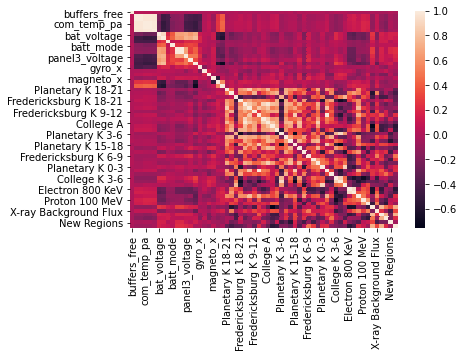

In [26]:
sns.heatmap(final_df2.corr())

<AxesSubplot:>

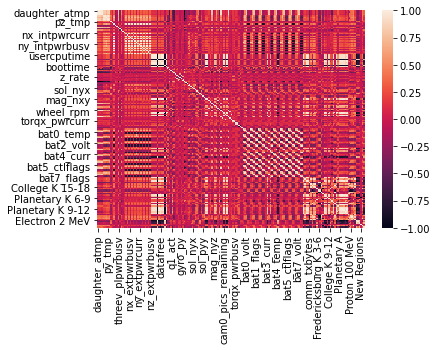

In [27]:
sns.heatmap(final_df1.corr())

# Outlier Detection using Inter Quantile range method


In [28]:
final_df1.describe()

daughter_atmp  daughter_btmp  threev_pltmp   rf_amptmp     nx_tmp  \
count     261.000000     261.000000    261.000000  261.000000  261.00000   
mean       15.948276      15.710728     15.185824   20.017241   -9.52682   
std        13.861062      13.925821     13.945738   12.915505   27.45565   
min        -3.500000      -4.000000     -4.500000    2.500000  -53.00000   
25%         1.000000       0.500000      0.000000    7.000000  -33.50000   
50%        13.000000      13.500000     12.000000   17.000000    0.50000   
75%        25.000000      24.500000     24.000000   29.000000   14.50000   
max        44.500000      43.500000     43.000000   45.500000   46.50000   

           px_tmp      ny_tmp      py_tmp      nz_tmp      pz_tmp  \
count  261.000000  261.000000  261.000000  261.000000  261.000000   
mean   -10.929119  -11.971264  -14.103448    7.467433   10.614943   
std     28.137980   27.886448   28.785961   17.208001   20.797286   
min    -54.500000  -55.500000  -56.000000  -17.500000  -21.500000   
25%    -33.000000  -37.000000  -41.000000  -12.500000  -12.000000   
50%     -2.000000   -7.000000  -12.500000    8.500000   19.500000   
75%     15.500000    7.500000   14.000000   21.500000   25.500000   
max     36.500000   50.500000   47.500000   47.500000   42.500000   

       atmelpwrcurr  atmelpwrbusv  threev_pwrcurr  threev_plpwrcurr  \
count    261.000000    261.000000      261.000000        261.000000   
mean       0.033635      3.916906        0.020042          0.025383   
std        0.008335      0.348485        0.001693          0.004566   
min        0.019531      3.593750        0.017578          0.023438   
25%        0.025391      3.687500        0.019043          0.023438   
50%        0.034668      3.812500        0.019531          0.023438   
75%        0.041504      4.000000        0.020020          0.023438   
max        0.055664      5.187500        0.028320          0.046875   

       threev_plpwrbusv  fivev_plpwrcurr  fivev_plpwrbusv  daughter_apwrbusv  \
count        261.000000       261.000000       261.000000         261.000000   
mean           3.300647         0.608387         4.883501           0.002514   
std            0.015192         0.095111         0.013933           0.028961   
min            3.281250         0.281250         4.875000           0.000000   
25%            3.281250         0.609375         4.875000           0.000000   
50%            3.312500         0.609375         4.875000           0.000000   
75%            3.312500         0.609375         4.906250           0.000000   
max            3.312500         0.765625         4.906250           0.375000   

       nx_intpwrcurr  nx_intpwrbusv  nx_extpwrcurr  nx_extpwrbusv  \
count     261.000000     261.000000     261.000000     261.000000   
mean        0.175467       3.938697       0.177622       3.937859   
std         0.528251       0.348005       0.523715       0.347926   
min         0.000000       3.625000       0.000000       3.625000   
25%         0.000000       3.687500       0.000000       3.687500   
50%         0.000000       3.843750       0.000000       3.843750   
75%         0.156250       4.062500       0.031250       4.031250   
max         3.984375       5.156250       3.984375       5.156250   

       px_intpwrcurr  px_intpwrbusv  px_extpwrcurr  px_extpwrbusv  \
count     261.000000     261.000000     261.000000     261.000000   
mean        0.245271       3.935704       0.159243       3.933788   
std         0.696222       0.346645       0.529939       0.346879   
min         0.000000       3.625000       0.000000       3.625000   
25%         0.000000       3.687500       0.000000       3.687500   
50%         0.000000       3.843750       0.000000       3.843750   
75%         0.046875       4.031250       0.109375       4.031250   
max         3.984375       5.156250       3.984375       5.156250   

       ny_intpwrcurr  ny_intpwrbusv  ny_extpwrcurr  ny_extpwrbusv  \
count     261.000000     2

In [29]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7f154c079b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f154c091280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f154c079820>],
 'medians': [<matplotlib.lines.Line2D at 0x7f154c091940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f154c091ca0>],
 'means': []}

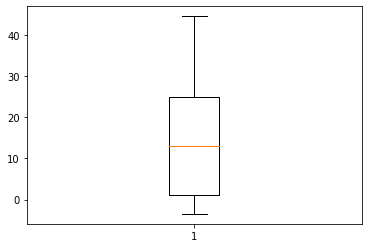

In [30]:
plt.boxplot(final_df1['daughter_atmp'])

In [31]:
min_max=[]

In [32]:
for c in final_df1.columns:
    q1,q3=np.percentile(final_df1[c].sort_values(),[25,75])
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr) # iqr = Inter Quantile Range
    upper_bound=q3+(1.5*iqr)
    min_max.append((lower_bound,upper_bound))
    
    

In [33]:
min_max[0][0]

-35.0

In [34]:
count_outliers=[]
i=0
for c in final_df1.columns:
    count_outliers.append((c,len(final_df1[final_df1[c]<min_max[i][0]]),len(final_df1[final_df1[c]>min_max[i][1]])))
    i+=1


In [35]:
count_outliers

[('daughter_atmp', 0, 0),
 ('daughter_btmp', 0, 0),
 ('threev_pltmp', 0, 0),
 ('rf_amptmp', 0, 0),
 ('nx_tmp', 0, 0),
 ('px_tmp', 0, 0),
 ('ny_tmp', 0, 0),
 ('py_tmp', 0, 0),
 ('nz_tmp', 0, 0),
 ('pz_tmp', 0, 0),
 ('atmelpwrcurr', 0, 0),
 ('atmelpwrbusv', 0, 27),
 ('threev_pwrcurr', 0, 16),
 ('threev_plpwrcurr', 0, 47),
 ('threev_plpwrbusv', 0, 0),
 ('fivev_plpwrcurr', 41, 62),
 ('fivev_plpwrbusv', 0, 0),
 ('daughter_apwrbusv', 0, 2),
 ('nx_intpwrcurr', 0, 23),
 ('nx_intpwrbusv', 0, 27),
 ('nx_extpwrcurr', 0, 49),
 ('nx_extpwrbusv', 0, 27),
 ('px_intpwrcurr', 0, 54),
 ('px_intpwrbusv', 0, 27),
 ('px_extpwrcurr', 0, 25),
 ('px_extpwrbusv', 0, 27),
 ('ny_intpwrcurr', 0, 39),
 ('ny_intpwrbusv', 0, 27),
 ('ny_extpwrcurr', 0, 24),
 ('ny_extpwrbusv', 0, 27),
 ('py_intpwrcurr', 0, 33),
 ('py_intpwrbusv', 0, 27),
 ('py_extpwrcurr', 0, 39),
 ('py_extpwrbusv', 0, 27),
 ('nz_extpwrcurr', 0, 64),
 ('nz_extpwrbusv', 0, 27),
 ('usercputime', 0, 0),
 ('syscputime', 0, 0),
 ('idlecputime', 0, 0),
 ('p

In [36]:
all_outliers=[]
for item in count_outliers:
    if item[1]/len(final_df1)> .10  or item[2]/len(final_df1)> .10:
        all_outliers.append(item[0])

In [37]:
all_outliers

['atmelpwrbusv',
 'threev_plpwrcurr',
 'fivev_plpwrcurr',
 'nx_intpwrbusv',
 'nx_extpwrcurr',
 'nx_extpwrbusv',
 'px_intpwrcurr',
 'px_intpwrbusv',
 'px_extpwrbusv',
 'ny_intpwrcurr',
 'ny_intpwrbusv',
 'ny_extpwrbusv',
 'py_intpwrcurr',
 'py_intpwrbusv',
 'py_extpwrcurr',
 'py_extpwrbusv',
 'nz_extpwrcurr',
 'nz_extpwrbusv',
 'x_rate',
 'mag_nxx',
 'wheel_rpm',
 'torqz_pwrcurr',
 'bat0_flags',
 'bat0_ctlflags',
 'bat1_flags',
 'bat1_ctlflags',
 'bat2_temp',
 'bat2_flags',
 'bat2_ctlflags',
 'bat3_curr',
 'bat3_ctlflags',
 'bat4_curr',
 'bat4_ctlflags',
 'bat5_curr',
 'bat5_flags',
 'bat5_ctlflags',
 'bat6_curr',
 'bat6_flags',
 'bat6_ctlflags',
 'bat7_flags',
 'bat7_ctlflags',
 'comm_txcount',
 'Planetary K 18-21',
 'College K 15-18',
 'Fredericksburg K 18-21',
 'Electron 2 MeV']

In [38]:
all_outliers=[]
for item in count_outliers:
    if item[1]/len(final_df1)> .20  or item[2]/len(final_df1)> .20: ## check if % of outliers is greater than 20 %
        all_outliers.append(item[0])

In [39]:
all_outliers

['fivev_plpwrcurr',
 'px_intpwrcurr',
 'nz_extpwrcurr',
 'bat0_ctlflags',
 'bat1_ctlflags',
 'bat2_ctlflags',
 'bat3_ctlflags',
 'bat4_ctlflags',
 'bat5_ctlflags',
 'bat6_ctlflags',
 'bat7_ctlflags']

{'whiskers': [<matplotlib.lines.Line2D at 0x7f153f7ed490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f153f7edb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f153f7ed130>],
 'medians': [<matplotlib.lines.Line2D at 0x7f153f7f6250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f153f7f65b0>],
 'means': []}

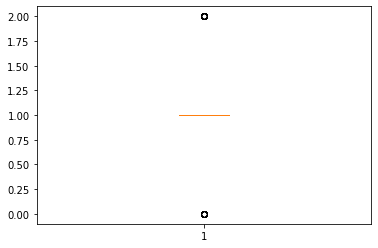

In [40]:
plt.boxplot(final_df1['Fredericksburg K 18-21'])

/home/charanpreet/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fredericksburg K 18-21'>

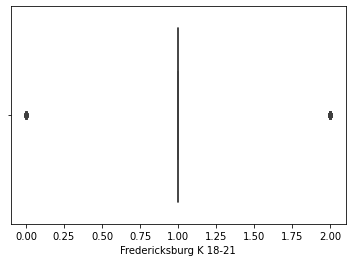

In [41]:
sns.boxplot(final_df1['Fredericksburg K 18-21'])

/home/charanpreet/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daughter_atmp', ylabel='Density'>

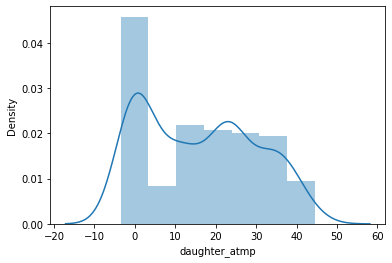

In [42]:
sns.distplot(final_df1['daughter_atmp'])

In [43]:
final_df1['Fredericksburg K 18-21'].value_counts() # 80% same data

1.0    203
2.0     37
0.0     21
Name: Fredericksburg K 18-21, dtype: int64

# Checking for constant columns

In [44]:
constants=[]
for c in final_df1.columns:
    if max(final_df1[c].value_counts())/len(final_df1) > 0.9:
        constants.append(c)
        
    

In [45]:
for item in constants:
    print(final_df1[item].value_counts())

0.00000    259
0.28125      1
0.37500      1
Name: daughter_apwrbusv, dtype: int64
2    256
3      5
Name: cam0_retry_fails, dtype: int64
0    256
1      5
Name: cam1_retry_fails, dtype: int64
0.000000    244
1.992188     17
Name: motor_pwrcurr, dtype: int64
1    260
0      1
Name: Planetary K 6-9, dtype: int64
1    240
0     21
Name: Planetary K 12-15, dtype: int64
0    260
1      1
Name: New Regions, dtype: int64


In [46]:
raw_df1.dtypes.value_counts()

int64      104
float64    102
object       4
dtype: int64

In [47]:
raw_df2.dtypes.value_counts()

int64      53
float64    23
object      4
dtype: int64

In [48]:
raw_df2.columns

Index(['dest_callsign', 'src_callsign', 'src_ssid', 'dest_ssid', 'ctl', 'pid',
       'beacon_verf_code', 'time_sync', 'timestamp', 'mission_files',
       'buffers_free', 'last_rssi', 'obc_temp1', 'obc_temp2', 'com_temp_pa',
       'com_temp_mcu', 'eps_temp_t4', 'bat_voltage', 'cur_sun', 'cur_sys',
       'batt_mode', 'panel1_voltage', 'panel2_voltage', 'panel3_voltage',
       'panel1_current', 'panel2_current', 'panel3_current', 'bat_bootcount',
       'gyro_x', 'gyro_y', 'gyro_z', 'magneto_x', 'magneto_y', 'magneto_z',
       'Planetary K 18-21', 'Planetary K 9-12', 'College K 0-3',
       'Fredericksburg K 18-21', 'College K 21-24', 'College K 15-18',
       'Fredericksburg K 9-12', 'Fredericksburg K 15-18', 'College K 12-15',
       'College A', 'Planetary K 21-24', 'College K 6-9', 'Planetary K 3-6',
       'Fredericksburg K 21-24', 'Fredericksburg A', 'Planetary K 15-18',
       'College K 9-12', 'Fredericksburg K 12-15', 'Fredericksburg K 6-9',
       'Planetary K 6-9', 'Plane

In [49]:
[ c for c in raw_df1.columns if raw_df1[c].dtype==float]

['daughter_atmp',
 'daughter_btmp',
 'threev_pltmp',
 'rf_amptmp',
 'nx_tmp',
 'px_tmp',
 'ny_tmp',
 'py_tmp',
 'nz_tmp',
 'pz_tmp',
 'atmelpwrcurr',
 'atmelpwrbusv',
 'threev_pwrcurr',
 'threev_pwrbusv',
 'threev_plpwrcurr',
 'threev_plpwrbusv',
 'fivev_plpwrcurr',
 'fivev_plpwrbusv',
 'daughter_apwrcurr',
 'daughter_apwrbusv',
 'daughter_bpwrcurr',
 'daughter_bpwrbusv',
 'nx_intpwrcurr',
 'nx_intpwrbusv',
 'nx_extpwrcurr',
 'nx_extpwrbusv',
 'px_intpwrcurr',
 'px_intpwrbusv',
 'px_extpwrcurr',
 'px_extpwrbusv',
 'ny_intpwrcurr',
 'ny_intpwrbusv',
 'ny_extpwrcurr',
 'ny_extpwrbusv',
 'py_intpwrcurr',
 'py_intpwrbusv',
 'py_extpwrcurr',
 'py_extpwrbusv',
 'nz_extpwrcurr',
 'nz_extpwrbusv',
 'q0_act',
 'q1_act',
 'q2_act',
 'q3_act',
 'x_rate',
 'y_rate',
 'z_rate',
 'gyro_px',
 'gyro_py',
 'gyro_iz',
 'gyro_pz',
 'gyro_ix',
 'gyro_iy',
 'cam0_temp',
 'cam1_temp',
 'torqx_pwrcurr',
 'torqx_pwrbusv',
 'torqy_pwrcurr',
 'torqy_pwrbusv',
 'torqz_pwrcurr',
 'torqz_pwrbusv',
 'motor_pwrcurr'

In [50]:
final_df1.dtypes.value_counts()

float64    95
int64      83
dtype: int64

In [51]:
final_df1.index

RangeIndex(start=0, stop=261, step=1)

In [52]:
final_df1.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [53]:
'time' in final_df1.columns

False

In [54]:
"time" in raw_df1.columns

False

In [55]:
final_df1.columns

Index(['daughter_atmp', 'daughter_btmp', 'threev_pltmp', 'rf_amptmp', 'nx_tmp',
       'px_tmp', 'ny_tmp', 'py_tmp', 'nz_tmp', 'pz_tmp',
       ...
       'Proton 100 MeV', 'Proton 1 MeV', 'Proton 10 MeV', 'Electron 2 MeV',
       'SESC sunspot number', 'X-Ray S', 'Radio Flux', 'New Regions',
       'X-ray Background Flux', 'Sunspot Area'],
      dtype='object', length=178)

# Training on other techniques

In [56]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [57]:
feat_imp={}

In [58]:
for c in final_df1.columns:
    X=final_df1.drop(c,axis=1)
    y=final_df1[c]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
    model=xgb.XGBRegressor()
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    importances = list(zip(model.feature_importances_, final_df1.columns))
    importances.sort(reverse=True)  
    feat_imp[c]=importances
    

/home/charanpreet/.local/lib/python3.8/site-packages/xgboost/sklearn.py:745: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


In [59]:
feat_imp

{'daughter_atmp': [(0.6305822, 'daughter_btmp'),
  (0.20672648, 'daughter_atmp'),
  (0.13541116, 'gyro_iz'),
  (0.016015891, 'wheel_rpm'),
  (0.0031202976, 'bat3_volt'),
  (0.0019129278, 'bat2_volt'),
  (0.001725159, 'threev_pltmp'),
  (0.0012922784, 'px_tmp'),
  (0.0006084483, 'nz_tmp'),
  (0.00042988028, 'nz_extpwrbusv'),
  (0.00027446894, 'bat0_volt'),
  (0.00024632306, 'sol_pyy'),
  (0.0002176612, 'sol_nyx'),
  (0.00015725511, 'nx_tmp'),
  (0.00012066421, 'bat1_volt'),
  (0.00011233635, 'cached'),
  (7.1147726e-05, 'sol_nyy'),
  (6.573102e-05, 'py_tmp'),
  (5.932528e-05, 'sol_pxy'),
  (5.7221776e-05, 'rf_amptmp'),
  (5.5763987e-05, 'sol_nxy'),
  (5.136921e-05, 'gyro_iy'),
  (4.0263025e-05, 'bat6_curr'),
  (3.8567898e-05, 'q0_act'),
  (3.1271713e-05, 'ny_intpwrbusv'),
  (2.9120982e-05, 'x_rate'),
  (2.9098093e-05, 'nx_extpwrbusv'),
  (2.539886e-05, 'ny_tmp'),
  (2.4024206e-05, 'sol_nzx'),
  (2.3087603e-05, 'mag_pyy'),
  (2.214777e-05, 'daughter_apwrbusv'),
  (2.0665091e-05, 'mag_nxy

In [60]:
new_feat_imp={}

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
for c in final_df1.columns:
    X=final_df1.drop(c,axis=1)
    y=final_df1[c]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
    model=GradientBoostingRegressor()
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    importances = list(zip(model.feature_importances_, final_df1.columns))
    importances.sort(reverse=True)  
    new_feat_imp[c]=importances
    

In [64]:
new_feat_imp

{'daughter_atmp': [(0.4549556605818437, 'daughter_btmp'),
  (0.38238653193255195, 'daughter_atmp'),
  (0.0850988936929088, 'threev_pltmp'),
  (0.052553295580134676, 'gyro_iz'),
  (0.012412471028269036, 'cam1_status'),
  (0.0051283706821989225, 'py_tmp'),
  (0.0023020049868923607, 'wheel_rpm'),
  (0.0008958574702244474, 'processes'),
  (0.0007632077259808682, 'sol_nzx'),
  (0.0006377834860540653, 'boottime'),
  (0.0006161225447167093, 'gyro_iy'),
  (0.00042795187788842063, 'px_tmp'),
  (0.0004145123034697554, 'bat2_volt'),
  (0.00031728116987880263, 'bat0_volt'),
  (0.00031064817555689824, 'sol_pxy'),
  (0.00015700899923077146, 'mag_pxx'),
  (0.00013031552722623645, 'bat1_volt'),
  (0.00012002612355082967, 'bat6_volt'),
  (6.38351005049141e-05, 'nx_tmp'),
  (3.4846273026990886e-05, 'rf_amptmp'),
  (2.4666214527418325e-05, 'flags'),
  (2.355760104002087e-05, 'nanderasures'),
  (2.3088653195831845e-05, 'sol_nxy'),
  (2.007607688572416e-05, 'torqy_pwrbusv'),
  (1.202211165577887e-05, 'thre

In [65]:
 parameters = {'learning_rate': [0.01,0.02],
                  'max_depth'    : [4,6]
                 }

In [66]:
gbr=GradientBoostingRegressor()

In [67]:
grid_feat_imp={}

In [68]:
for c in final_df1.columns:
    X=final_df1.drop(c,axis=1)
    y=final_df1[c]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
    new_model=GridSearchCV(estimator=gbr,param_grid=parameters)
    new_model.fit(X_train,y_train)
    pred=new_model.predict(X_test)
    importances = list(zip(new_model.best_estimator_.feature_importances_, final_df1.columns))
    importances.sort(reverse=True)  
    grid_feat_imp[c]=importances
    

In [69]:
grid_feat_imp

{'daughter_atmp': [(0.3873803973779596, 'daughter_atmp'),
  (0.36307147470745055, 'daughter_btmp'),
  (0.19184402522966357, 'threev_pltmp'),
  (0.024721434239492912, 'cam1_status'),
  (0.022074373439743913, 'gyro_iz'),
  (0.0015629427905534492, 'gyro_iy'),
  (0.0007033406371454451, 'processes'),
  (0.0005437851559636415, 'mag_pxx'),
  (0.0005166186076687859, 'idlecputime'),
  (0.00046097053433072956, 'nz_tmp'),
  (0.0004513105573185495, 'rf_amptmp'),
  (0.00043835659802850897, 'mag_nyz'),
  (0.0003676573055571893, 'sol_nzy'),
  (0.0003151087196555362, 'nanderasures'),
  (0.00030421586326825976, 'mag_pyx'),
  (0.0002929059889802605, 'usercputime'),
  (0.00027500329545928774, 'mag_pyz'),
  (0.0002595622355550167, 'wheel_rpm'),
  (0.00023457989618006755, 'px_tmp'),
  (0.00023155980390729254, 'beaconcnt'),
  (0.00022902710611375347, 'bat0_volt'),
  (0.00022648224971116344, 'py_tmp'),
  (0.00019276578976144284, 'nx_tmp'),
  (0.00017986087399523244, 'sol_nxx'),
  (0.00016487756064428134, 'q1

In [80]:
rf_feat_imp={}

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
for c in final_df1.columns:
    X=final_df1.drop(c,axis=1)
    y=final_df1[c]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
    model=RandomForestRegressor()
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    importances = list(zip(model.feature_importances_, final_df1.columns))
    importances.sort(reverse=True)  
    rf_feat_imp[c]=importances
    

In [83]:
rf_feat_imp

{'daughter_atmp': [(0.40535613845063356, 'daughter_atmp'),
  (0.3860428197474038, 'daughter_btmp'),
  (0.12981935105769987, 'threev_pltmp'),
  (0.0247739636506957, 'cam1_status'),
  (0.020261031194722817, 'gyro_iz'),
  (0.007448852129503882, 'mag_pyz'),
  (0.0033573213625613762, 'usercputime'),
  (0.002532718508382399, 'nanderasures'),
  (0.0021625193323391483, 'datafree'),
  (0.0016032432386950263, 'idlecputime'),
  (0.00158808154742679, 'mag_nxy'),
  (0.00123387714528561, 'boottime'),
  (0.001051079163432133, 'ny_tmp'),
  (0.0008071030802910135, 'mag_nyz'),
  (0.0006570887329466905, 'cached'),
  (0.0006322498924730288, 'wheel_rpm'),
  (0.0006007739678841392, 'sol_nzy'),
  (0.0005828175130703483, 'mag_pxx'),
  (0.0005207060741928687, 'gyro_iy'),
  (0.00042350932045524033, 'sol_pyy'),
  (0.000364079180702658, 'processes'),
  (0.0003514705198560923, 'py_tmp'),
  (0.0003397244796356213, 'mag_nxz'),
  (0.00032438825710261605, 'nz_extpwrbusv'),
  (0.000299898633390726, 'sol_nxx'),
  (0.000